<a href="https://colab.research.google.com/github/hamzaae/Machine-Learning/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MiniSom** is a minimalistic and *Numpy* based implementation of the Self Organizing Maps (SOM). SOM is a type of *Artificial Neural Network* able to convert complex, nonlinear statistical relationships between ***high-dimensional*** data items into simple geometric relationships on a ***low-dimensional*** display.
---

In this example we will see how to use MiniSom to cluster the seeds dataset.

First lets install minisom:

In [ ]:
!pip install minisom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.1-py3-none-any.whl size=10609 sha256=01211763024c7e49844f484dcfba59f227617aeeb3e96790a9ace825955d1099
  Stored in directory: /root/.cache/pip/wheels/c7/92/d2/33bbda5f86fd8830510b16aa98c8dd420129b5cb24248fd6db
Successfully built minisom


Importing nessessery modules:

In [ ]:
from minisom import MiniSom
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Then, let's load the data and have a look:

In [ ]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt',
                    names=['area', 'perimeter', 'compactness', 'length_kernel', 'width_kernel',
                   'asymmetry_coefficient', 'length_kernel_groove', 'target'], usecols=[0, 5],
                   sep='\t+', engine='python')
data.describe()

,area,asymmetry_coefficient
count,210.000000,210.000000
mean,14.847524,3.700201
std,2.909699,1.503557
min,10.590000,0.765100
25%,12.270000,2.561500
50%,14.355000,3.599000
75%,17.305000,4.768750
max,21.180000,8.456000


First rows are like the following:

In [ ]:
data.head()

,area,asymmetry_coefficient
0,15.26,2.221
1,14.88,1.018
2,14.29,2.699
3,13.84,2.259
4,16.14,1.355


Now let's train our SOM:

In [ ]:
# data normalization
data = (data - np.mean(data, axis=0)) / np.std(data, axis=0)
data = data.values

# Initialization and training
som_shape = (1, 3)
som = MiniSom(som_shape[0], som_shape[1], data.shape[1], sigma=.5, learning_rate=.4,
              neighborhood_function='gaussian', random_seed=10)

som.train_batch(data, 500, verbose=True)

 [ 500 / 500 ] 100% - 0:00:00 left 
 quantization error: 0.8363538736172659


Now we will consider all the sample mapped into a specific neuron as a cluster. To identify each cluster more easily we will translate the bidimensional indexes of the neurons on the SOM into a monodimentional indexes:

In [ ]:
#each neuron represents a cluster
winner_coordinates = np.array([som.winner(x) for x in data]).T
# with np.ravel_multi_index we convert the bidimensional coordinates to a monodimensional index
cluster_index = np.ravel_multi_index(winner_coordinates, som_shape)

Now let's plot the different clusters:


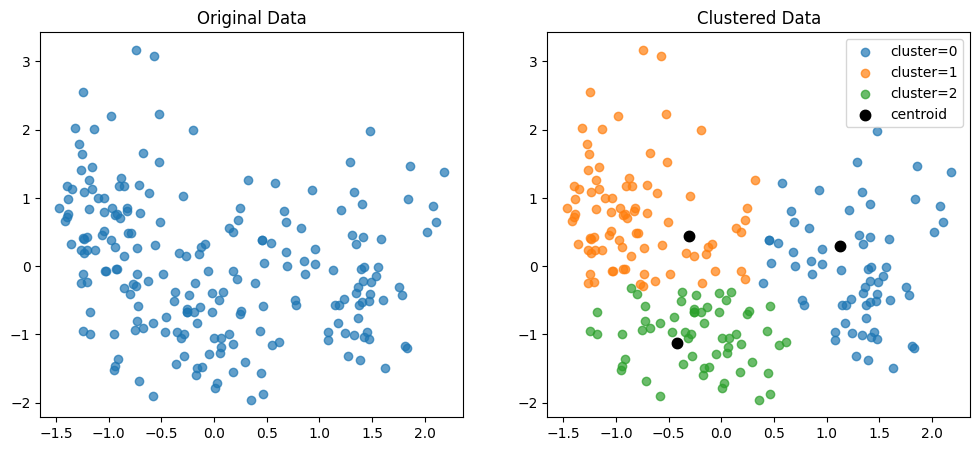

In [ ]:
# plot original data
plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.scatter(data[:, 0], data[:, 1], alpha=0.7)
plt.title('Original Data')

# plot clustered data
plt.subplot(122)
for c in np.unique(cluster_index):
    plt.scatter(data[cluster_index == c, 0],
                data[cluster_index == c, 1], label='cluster='+str(c), alpha=.7)
# plotting centroids
for centroid in som.get_weights():
    plt.scatter(centroid[:, 0], centroid[:, 1], marker='.',
                s=50, linewidths=5, color='k', label='centroid')
plt.title('Clustered Data')
plt.legend()

plt.show()
